In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from ucimlrepo import fetch_ucirepo 

In [22]:
bank_data_obj = fetch_ucirepo(id=222) 

X = bank_data_obj.data.features 
y = bank_data_obj.data.targets 
bank_data = X.copy()
bank_data['y'] = y

In [23]:
display("Dataset Shape:", bank_data.shape)
display("\nFirst 5 rows of the dataset:")
display(bank_data.head())
display("\nDataset Information:")
display(bank_data.info())
display("\nSummary Statistics:")
display(bank_data.describe())

'Dataset Shape:'

(45211, 17)

'\nFirst 5 rows of the dataset:'

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


'\nDataset Information:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


None

'\nSummary Statistics:'

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [24]:
display("Missing Values:")
display(bank_data.isnull().sum())
display("Target Variable Distribution:")
display(bank_data['y'].value_counts())
display(bank_data['y'].value_counts() / len(bank_data) * 100)

'Missing Values:'

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

'Target Variable Distribution:'

y
no     39922
yes     5289
Name: count, dtype: int64

y
no     88.30152
yes    11.69848
Name: count, dtype: float64

In [25]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    bank_data[column] = le.fit_transform(bank_data[column])
    label_encoders[column] = le

le_y = LabelEncoder()
bank_data['y'] = le_y.fit_transform(bank_data['y'])

In [ ]:
X = bank_data.drop('y', axis=1)
y = bank_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

Correlation between numerical features:


,age,duration,campaign,pdays,previous,balance
age,1.000000,-0.004284,0.007818,-0.024410,0.001832,0.096164
duration,-0.004284,1.000000,-0.086704,-0.006306,-0.000790,0.021114
campaign,0.007818,-0.086704,1.000000,-0.088898,-0.031240,-0.014405
pdays,-0.024410,-0.006306,-0.088898,1.000000,0.438963,0.003141
previous,0.001832,-0.000790,-0.031240,0.438963,1.000000,0.017328
balance,0.096164,0.021114,-0.014405,0.003141,0.017328,1.000000


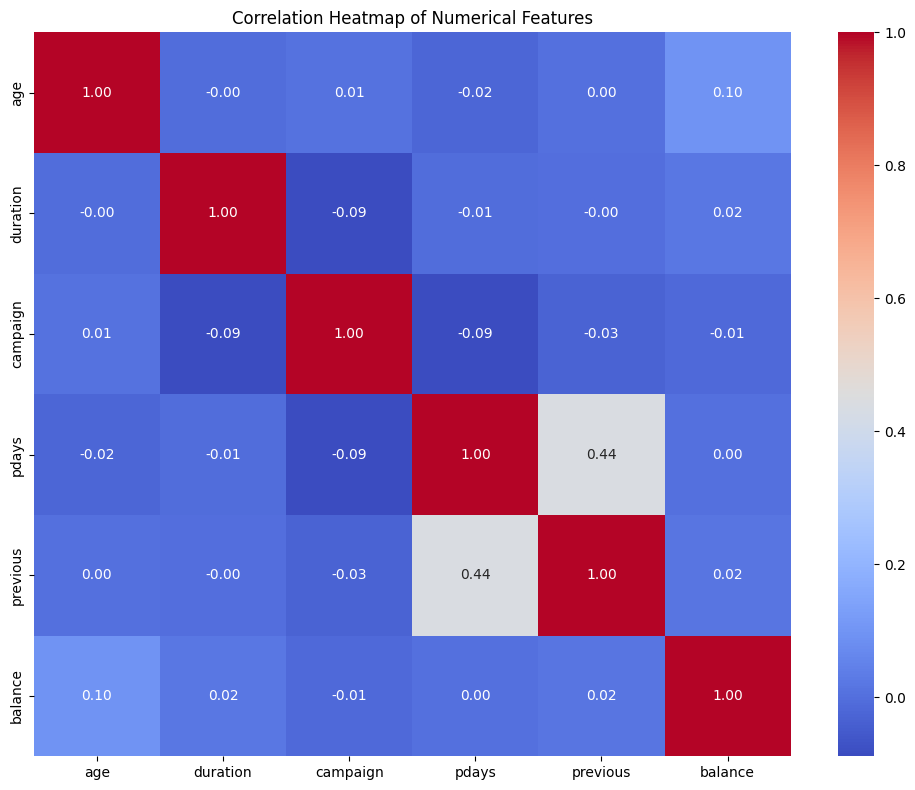


After scaling - X_train sample:


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
24001,-0.460434,9,0,1,0,-0.164410,0,0,1,28,1,-0.457311,-0.246104,-0.410910,-0.241509,3
43409,-1.589641,8,2,1,0,0.899627,0,0,0,4,0,2.502493,0.398202,1.446096,2.664584,0
20669,0.292371,9,2,1,0,-0.365486,1,0,0,11,1,5.697691,0.398202,-0.410910,-0.241509,3
18810,0.668773,10,1,1,0,-0.445003,0,0,1,30,5,-0.862499,2.653271,-0.410910,-0.241509,3
23130,-0.272233,9,1,1,0,-0.361249,0,0,0,25,1,-0.777602,2.331118,-0.410910,-0.241509,3



After scaling - X_test sample:


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
1392,-0.084032,1,1,0,0,-0.236433,1,1,2,7,8,0.341489,-0.246104,-0.41091,-0.241509,3
7518,0.292371,9,1,1,0,-0.321816,1,0,2,29,8,-0.214198,-0.246104,-0.41091,-0.241509,3
12007,-0.930937,7,1,1,0,-0.328986,1,0,2,19,6,-0.117724,0.720354,-0.41091,-0.241509,3
5536,-0.460434,1,1,0,0,-0.231544,1,0,2,22,8,-0.407144,0.398202,-0.41091,-0.241509,3
29816,-0.648635,7,2,1,0,0.181035,1,0,0,3,3,-0.762166,-0.568256,-0.41091,-0.241509,3


In [ ]:
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'balance']

correlation = X_train[numerical_features].corr()
print("Correlation between numerical features:")
display(correlation)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("\nAfter scaling - X_train sample:")
display(X_train.head())
print("\nAfter scaling - X_test sample:")
display(X_test.head())

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_balanced, y_train_balanced)

y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


Training Random Forest Classifier...

Accuracy: 0.8836


In [31]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7985
           1       0.62      0.01      0.02      1058

    accuracy                           0.88      9043
   macro avg       0.75      0.51      0.48      9043
weighted avg       0.85      0.88      0.83      9043



In [32]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance.head(10))


Feature Importance:
        Feature  Importance
11     duration    0.321662
6       housing    0.106031
8       contact    0.083197
10        month    0.071633
5       balance    0.068352
9   day_of_week    0.058863
0           age    0.052663
1           job    0.045511
13        pdays    0.038048
12     campaign    0.037692
